In [31]:
from numpy import log, log2
from math import pi
import numpy as np
from scipy.linalg import logm, expm

import roboticstoolbox as rtb
from roboticstoolbox import DHRobot, RevoluteDH, ctraj
from spatialmath import SO2, SE2, Twist2, Twist3, SE3, UnitQuaternion
from spatialmath.base import rotx, rot2, det, simplify, skew, vex, trot2, transl2, trplot2, plot_point, tranimate, trotx, troty
from spatialmath.base import transl, trplot
import spatialmath.base.symbolic as sym

In [7]:
np.set_printoptions(formatter={'float': lambda x: "{0: 0.4f}".format(x)})

#### Replacements  
Twist('R', C) -> Twist2.Revolute(C)  
tw.T -> tw.exp  
* -> @  

Given  
$^A\xi_B$,  
A is the reference frame  
B is the target frame  

$^AP = ^A\xi_B \cdot ^BP$

We use the operator ⊕ to indicate
composition of relative poses

$^AP = (^A\xi_B \oplus ^B\xi_C) \bullet ^CP$

In [8]:
R = rot2(0.2)
d = det(R)
d

1.00000000000000

In [9]:
theta = sym.symbol('theta')
R = rot2(theta)
R

array([[cos(theta), -sin(theta)],
       [sin(theta), cos(theta)]], dtype=object)

In [10]:
simplify(R * R)

[[cos(theta)**2, sin(theta)**2], [sin(theta)**2, cos(theta)**2]]

In [11]:
simplify(det(R))

1

Matrix Exponential

In [12]:
R = rot2(0.3)
R

array([[ 0.9553, -0.2955],
       [ 0.2955,  0.9553]])

In [13]:
R = rot2(0.3)
S = logm(R)

In [14]:
k = skew(2)

In [15]:
vex(S)

array([ 0.3000])

In [16]:
expm(S)

array([[ 0.9553, -0.2955],
       [ 0.2955,  0.9553]])

$R = e^{[\theta]_x} \exists SO(2)$

In [17]:
R = rot2(0.3)
R = expm(skew(0.3))
R

array([[ 0.9553, -0.2955],
       [ 0.2955,  0.9553]])

Pose in 2-Dimensions

Homogeneous Transformation Matrix

$^A\tilde{P} = ^AT_B\space^B\tilde{P}$

$T = \begin{pmatrix}R&t\\0_{1x2}&1\end{pmatrix}$  
  
$T^-1 = \begin{pmatrix}R^T&-R^Tt\\0_{1x2}&1\end{pmatrix}$

In [47]:
T1 = transl2(1, 2) @ trot2(30, 'deg')
T1

array([[ 0.8660254, -0.5      ,  1.       ],
       [ 0.5      ,  0.8660254,  2.       ],
       [ 0.       ,  0.       ,  1.       ]])

In [46]:
trot2(30, 'deg') @ transl2(1, 2)

array([[ 0.8660254 , -0.5       , -0.1339746 ],
       [ 0.5       ,  0.8660254 ,  2.23205081],
       [ 0.        ,  0.        ,  1.        ]])

<Axes3DSubplot:xlabel='X', ylabel='Y'>

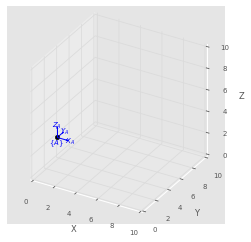

In [19]:
trplot( transl(1,2,3), frame='A', rviz=True, width=1, dims=[0, 10, 0, 10, 0, 10])

<AxesSubplot:xlabel='X', ylabel='X'>

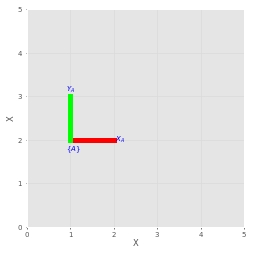

In [20]:
trplot2( transl2(1,2), frame='A', rviz=True, width=1, dims=[0, 5, 0, 5])

In [21]:
transl2(1,2) @ trot2(30, 'deg')

array([[ 0.8660, -0.5000,  1.0000],
       [ 0.5000,  0.8660,  2.0000],
       [ 0.0000,  0.0000,  1.0000]])

In [22]:
T = transl2(1, 2) @ trot2(180, 'deg')
T

array([[-1.0000, -0.0000,  1.0000],
       [ 0.0000, -1.0000,  2.0000],
       [ 0.0000,  0.0000,  1.0000]])

<AxesSubplot:xlabel='X', ylabel='X'>

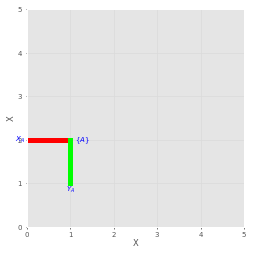

In [23]:
trplot2( T, frame='A', rviz=True, width=1, dims=[0, 5, 0, 5], color='b')

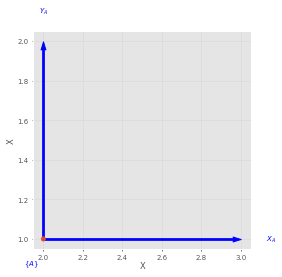

In [24]:
T2 = transl2(2, 1)
trplot2(T2, color='blue', frame='A');

<Axes3DSubplot:xlabel='X', ylabel='X'>

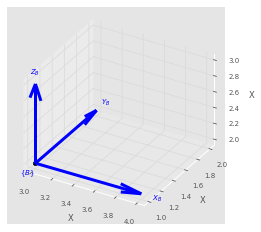

In [25]:
trplot( transl(3,1, 2), color='blue', width=3, frame='B')

[[<matplotlib.lines.Line2D at 0x22f4ea79280>]]

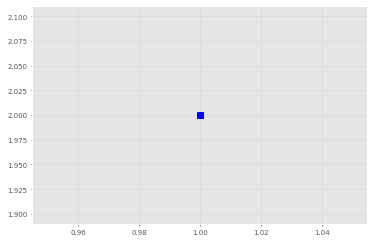

In [26]:
C = np.array([1, 2]).T
plot_point(C, label='C')

In [27]:
X = transl2(2, 3);
R = trot2(2)
RC = transl2(C) * R * transl2(-C)
RC

array([[-0.4161, -0.0000, -0.0000],
       [ 0.0000, -0.4161, -0.0000],
       [ 0.0000,  0.0000,  1.0000]])

In [28]:
R

array([[-0.4161, -0.9093,  0.0000],
       [ 0.9093, -0.4161,  0.0000],
       [ 0.0000,  0.0000,  1.0000]])

array([[-0.4161, -0.0000,  0.0000],
       [ 0.0000, -0.4161,  0.0000],
       [ 0.0000,  0.0000,  1.0000]])

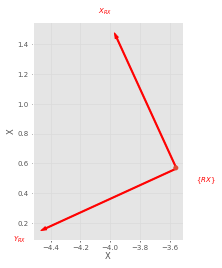

In [29]:
trplot2(R@X, frame='RX', color='red');
R*X

In [30]:
tw = Twist2.Revolute([1, 2])
tw.se2()
tw.pole()
tw.exp(2)

  -0.4161   -0.9093    3.235     
   0.9093   -0.4161    1.923     
   0         0         1         


Working in 3D

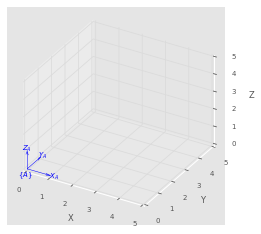

In [31]:
tranimate(transl(4, 3, 4)@trotx(2)@troty(-2), frame='A', arrow=False, dims=[0, 5], nframes=200)

In [32]:
#tranimate(transl(4, 3, 4)@trotx(2)@troty(-2), frame='A', arrow=False, dims=[0, 5], nframes=200, movie='out.mp4')

In [33]:
trotx(2) * troty(-2)

array([[-0.4161,  0.0000, -0.0000,  0.0000],
       [ 0.0000, -0.4161, -0.0000,  0.0000],
       [ 0.0000,  0.0000,  0.1732,  0.0000],
       [ 0.0000,  0.0000,  0.0000,  1.0000]])

In [34]:
trotx(2) @ troty(-2)

array([[-0.4161,  0.0000, -0.9093,  0.0000],
       [-0.8268, -0.4161,  0.3784,  0.0000],
       [-0.3784,  0.9093,  0.1732,  0.0000],
       [ 0.0000,  0.0000,  0.0000,  1.0000]])

D:\programs\Python\Python39\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


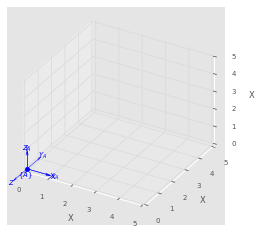

In [35]:
R = rotx(np.pi/2)
trplot(R)
a = tranimate(R, frame='A', arrow=False, dims=[0, 5], nframes=200)
a
#import time
#time.sleep(500)

<Axes3DSubplot:xlabel='X', ylabel='Y'>

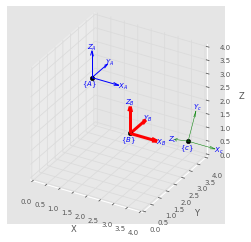

In [36]:
trplot( transl(1,2,3), frame='A', rviz=True, width=1, dims=[0, 10, 0, 10, 0, 10])
trplot( transl(3,1, 2), color='red', width=3, frame='B')
trplot( transl(4, 3, 1)@trotx(pi/3), color='green', frame='c', dims=[0,4,0,4,0,4])

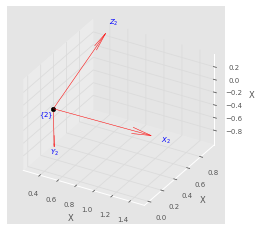

In [37]:
T = SE3(0.5, 0.0, 0.0) * SE3.RPY([0.1, 0.2, 0.3], order='xyz')* SE3.Rx(-90, unit='deg')
T.eul()
T.R
T.plot(color='red', frame='2')

In [38]:
UnitQuaternion.Rx(0.3)

 0.9888 <<  0.1494,  0.0000,  0.0000 >>


In [39]:
UnitQuaternion.AngVec(0.3, [1, 0, 0])

 0.9888 <<  0.1494,  0.0000,  0.0000 >>


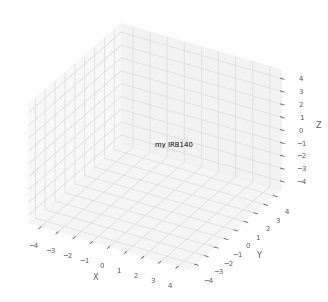

PyPlot3D backend, t = 0.05, scene:
  my IRB140

<Figure size 432x288 with 0 Axes>

In [40]:
d1 = 1
a1 = 1
a2 = 1

robot = DHRobot(
    [
        RevoluteDH(d=d1, a=a1, alpha=-pi/2),
        RevoluteDH(a=a2),
        RevoluteDH(alpha=pi/2),
    ], name="my IRB140")
T = robot.fkine([1, 3, 1])
q, *_ = robot.ikine_LM(T)
q
robot.plot(q)

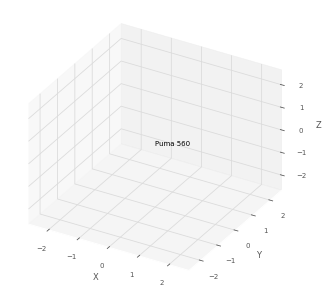

PyPlot3D backend, t = 0.05, scene:
  Puma 560

<Figure size 432x288 with 0 Axes>

In [41]:
puma = rtb.models.DH.Puma560()
T = puma.fkine([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
q, *_ = puma.ikine_LM(T)
q
puma.plot(q)

In [28]:
q = puma.ikine_a(T, config="lun")

d:\programs\python\python39\lib\site-packages\roboticstoolbox\models\DH\Puma560.py:260: RuntimeWarning: invalid value encountered in arcsin
  theta[0] = np.arctan2(Py, Px) + np.pi - np.arcsin(d3 / r)
d:\programs\python\python39\lib\site-packages\spatialmath\base\vectors.py:559: RuntimeWarning: invalid value encountered in remainder
  return np.mod(a + math.pi, 2 * math.pi) - math.pi


In [29]:
traj = rtb.jtraj(puma.qz, puma.qr, 100)
rtb.qplot(traj.j)

AttributeError: 'Trajectory' object has no attribute 'j'

In [34]:
t = np.arange(0, 2, 0.010)
T0 = SE3(0.6, -0.5, 0.0)
T1 = SE3(0.4, 0.5, 0.2)
Ts = ctraj(T0, T1, t)
len(Ts)
qs, *_ = puma.ikine_LM(Ts)
qs.shape

(200, 6)

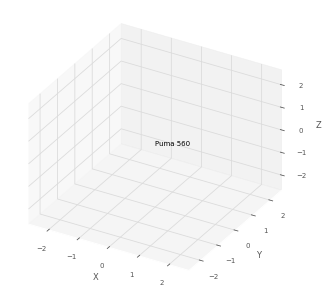

TypeError: invalid input type

In [43]:
from roboticstoolbox.backends import PyPlot
pyplot = PyPlot.PyPlot()
pyplot.launch() # create graphical world
pyplot.add(puma) # add robot to the world
puma.q = SE3(0.6, -0.5, 0.0) # update the robot
pyplot.step() # display the world

In [ ]:
q = sym.symbol("q_:6") # q = (q_1, q_2, ... q_5)
T = puma.fkine(q)
T

In [49]:
robot = DHRobot(
    [
        RevoluteDH(d=0, a=1, alpha=0),
        RevoluteDH(a=1),
        RevoluteDH(alpha=0),
    ], name="my IRB140")
robot

DHRobot: my IRB140, 3 joints (RRR), dynamics, standard DH parameters
┏━━━━┳━━━━┳━━━━┳━━━━━━┓
┃θⱼ  ┃ dⱼ ┃ aⱼ ┃  ⍺ⱼ  ┃
┣━━━━╋━━━━╋━━━━╋━━━━━━┫
┃ q1 ┃  0 ┃  1 ┃ 0.0° ┃
┃ q2 ┃  0 ┃  1 ┃ 0.0° ┃
┃ q3 ┃  0 ┃  0 ┃ 0.0° ┃
┗━━━━┻━━━━┻━━━━┻━━━━━━┛